## Importing and understanding the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## TASK 1 (EDA)

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (ie, whether they leave the company or continue to work) 

In [6]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [7]:
print("No of employees lost by the company: ", df[df['left']==1].shape[0])
print("No of employees retained by the company: ", df[df['left']==0].shape[0])

No of employees lost by the company:  3571
No of employees retained by the company:  11428


In [8]:
df.groupby('left').mean() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:>

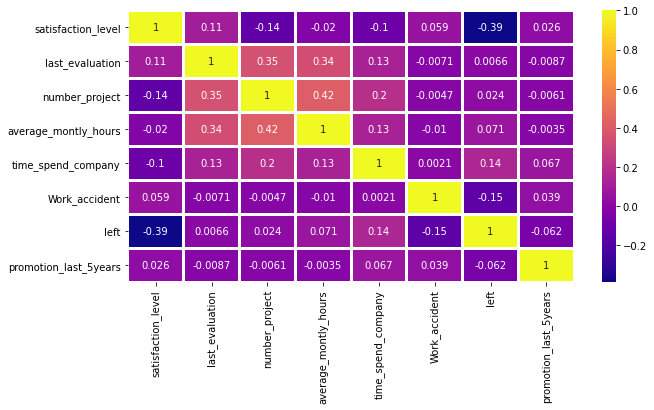

In [9]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), linewidths = 2, cmap="plasma", annot=True)

In [10]:
df1 = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left']]

### Heatmap of continuous value attributes only

<AxesSubplot:>

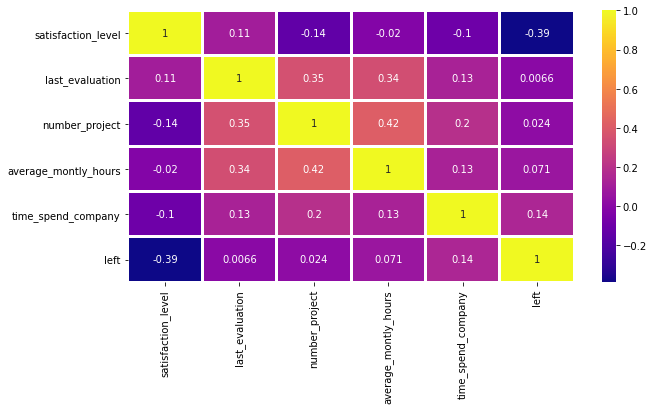

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df1.corr(), linewidths = 2, cmap="plasma", annot=True)

### Pairplot with Employee Retention as hue

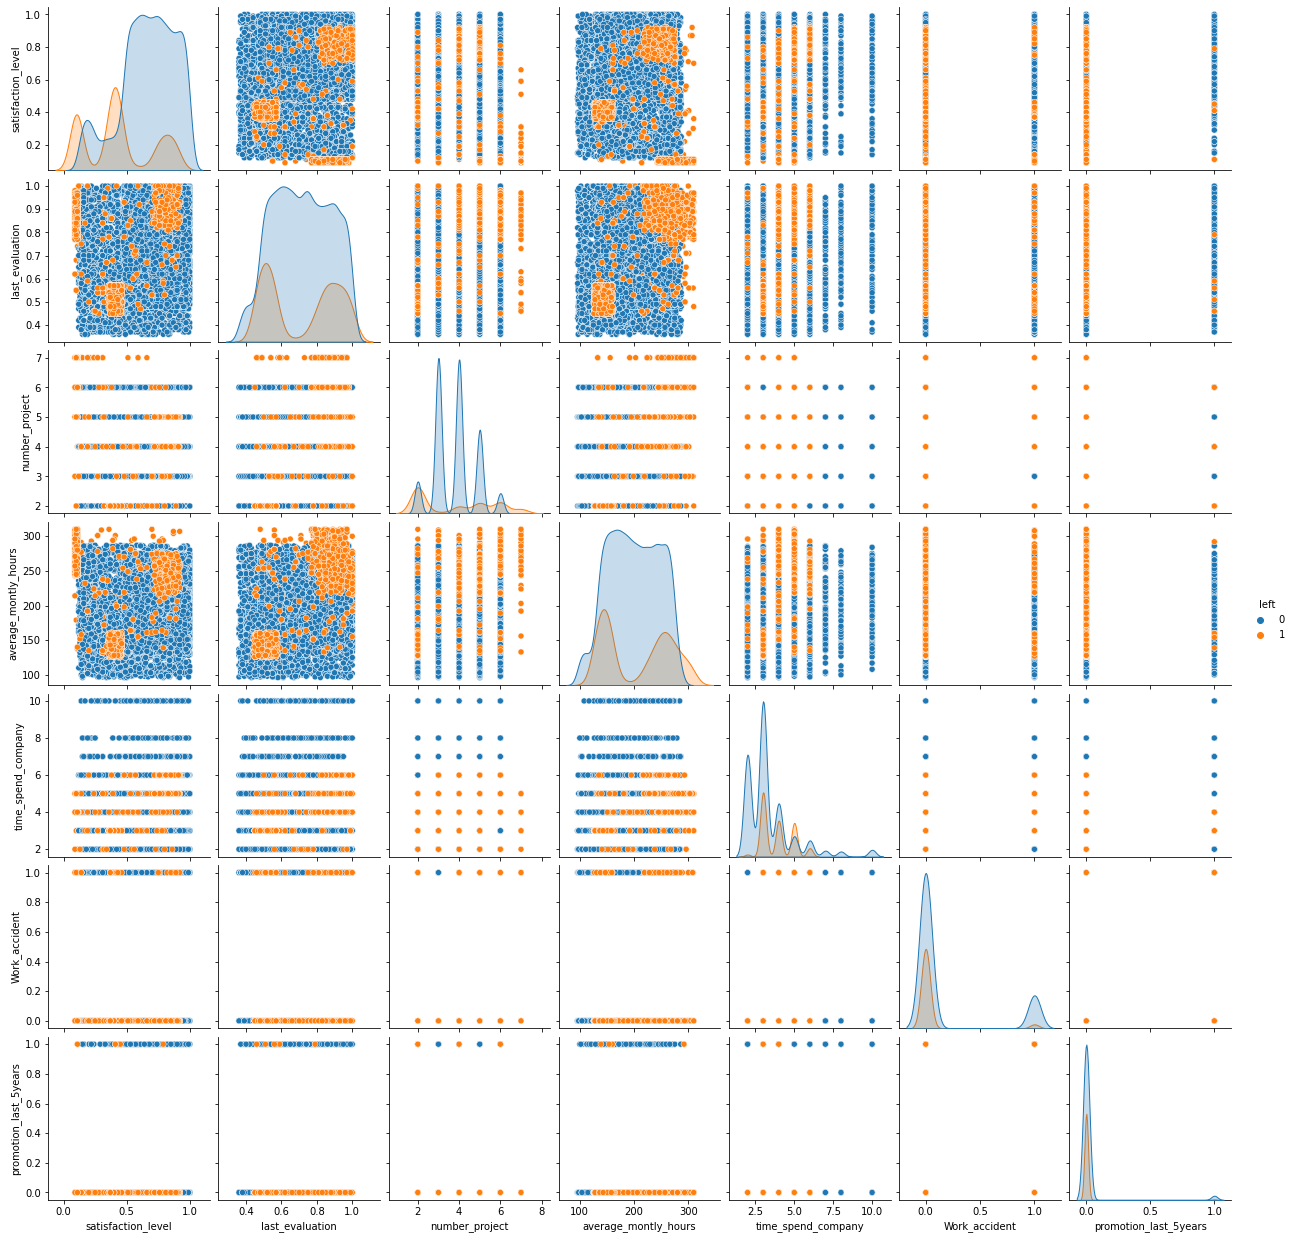

In [12]:
sns.pairplot(df, hue="left")

We see that the plots made by each of the two from the following classifies Employees Retained from Employees left:
- satisfaction level
- average monthly hours
- last evaluation

## TASK 2

### A. Comparing Employee Retention with Salary

In [13]:
df1 = df[['left','salary']]
left = df1[df['left']==1].salary.value_counts()
retained = df1[df['left']==0].salary.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts1 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts1 = pd.DataFrame(counts1)
counts1

,retained,left,retained_percent,left_percent
low,5144,2172,0.703116,0.296884
medium,5129,1317,0.795687,0.204313
high,1155,82,0.933711,0.066289


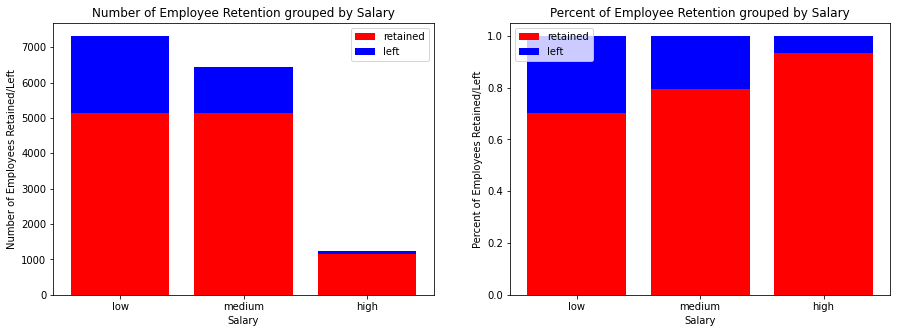

In [14]:
x = counts1.index
y1 = counts1.retained
y2 = counts1.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])
y1 = counts1.retained_percent
y2 = counts1.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

Here, we see that the lower the salary, the more number of employees left their job at the company

## TASK 3

### B. Comparing Employee Retention with Department

In [15]:
df1 = df[['left','Department']]
left = df1[df['left']==1].Department.value_counts()
retained = df1[df['left']==0].Department.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts2 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts2 = pd.DataFrame(counts2)
counts2

,retained,left,retained_percent,left_percent
IT,954,273,0.777506,0.222494
RandD,666,121,0.846252,0.153748
accounting,563,204,0.734029,0.265971
hr,524,215,0.709066,0.290934
management,539,91,0.855556,0.144444
marketing,655,203,0.763403,0.236597
product_mng,704,198,0.780488,0.219512
sales,3126,1014,0.755072,0.244928
support,1674,555,0.751009,0.248991
technical,2023,697,0.743750,0.256250


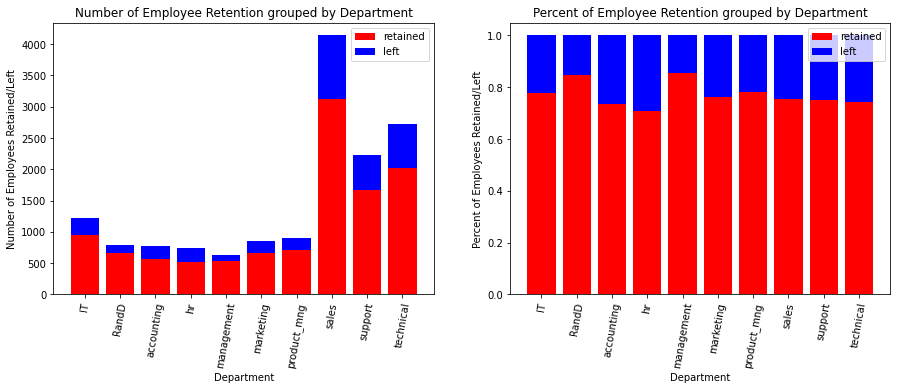

In [16]:
x = counts2.index
y1 = counts2.retained
y2 = counts2.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

y1 = counts2.retained_percent
y2 = counts2.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Percent of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

plt.show()

Here, we see that the percentage of Employees retained are slightly greater for the Department Management and RandD

### C. Comparing Employee Retention with Work Accident

In [17]:
df1 = df[['left','Work_accident']]
left = df1[df['left']==1].Work_accident.value_counts()
retained = df1[df['left']==0].Work_accident.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts3 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts3 = pd.DataFrame(counts3)
counts3.index = ["No", "Yes"]
counts3

,retained,left,retained_percent,left_percent
No,9428,3402,0.734840,0.265160
Yes,2000,169,0.922084,0.077916


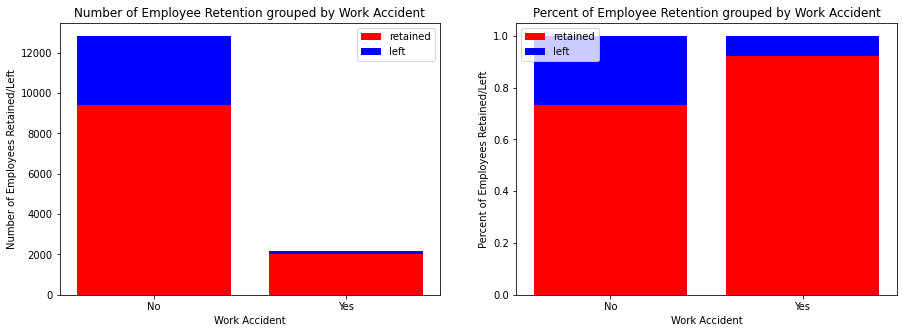

In [18]:
x = counts3.index
y1 = counts3.retained
y2 = counts3.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts3.retained_percent
y2 = counts3.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

### D. Comparing Employee Retention with promotion in last 5 years

In [19]:
df1 = df[['left','promotion_last_5years']]
left = df1[df['left']==1].promotion_last_5years.value_counts()
retained = df1[df['left']==0].promotion_last_5years.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts4 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts4 = pd.DataFrame(counts4)
counts4.index = ["No", "Yes"]
counts4

,retained,left,retained_percent,left_percent
No,11128,3552,0.758038,0.241962
Yes,300,19,0.940439,0.059561


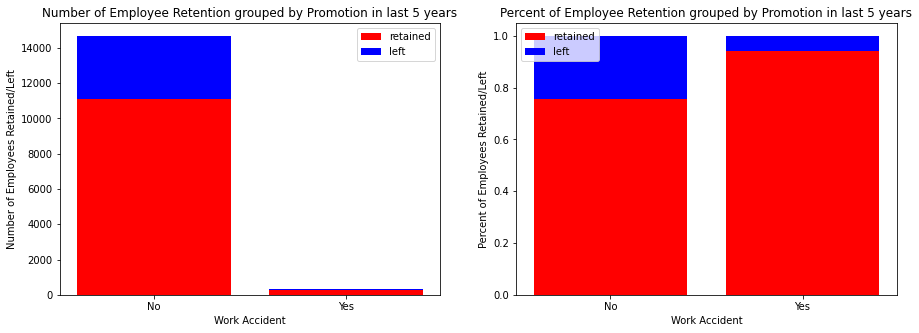

In [20]:
x = counts4.index
y1 = counts4.retained
y2 = counts4.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts4.retained_percent
y2 = counts4.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

Though the number of Employees retained are higher when they have gotten a promotion in the last 5 years, there are very few Employees with promotions

### E. Comparing Employee Retention with continuous valued attributes, namely:

1. satisfaction_level
2. last_evaluation
3. average_montly_hours
4. time_spend_company
5. sns.boxplot(data = df, y='number_project', x='left')

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

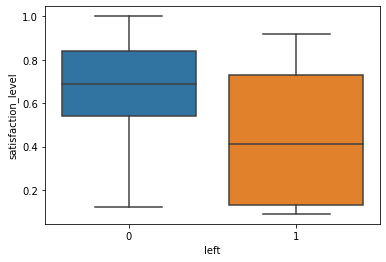

In [21]:
sns.boxplot(data = df, y='satisfaction_level', x='left')

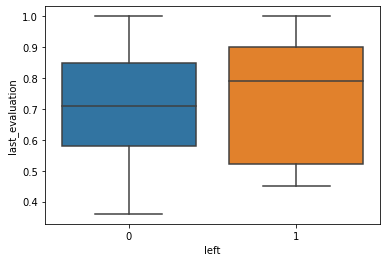

In [22]:
box=sns.boxplot(data = df, y='last_evaluation', x='left')

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

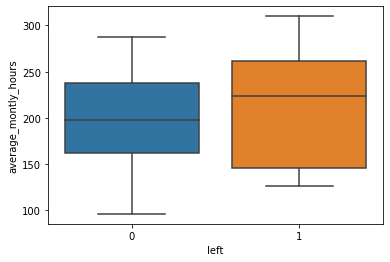

In [23]:
sns.boxplot(data = df, y='average_montly_hours', x='left')

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

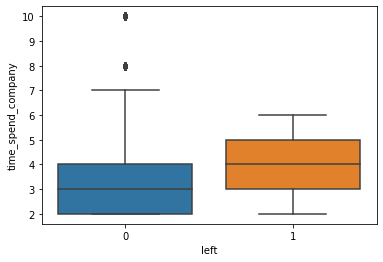

In [24]:
sns.boxplot(data = df, y='time_spend_company', x='left')

<AxesSubplot:xlabel='left', ylabel='number_project'>

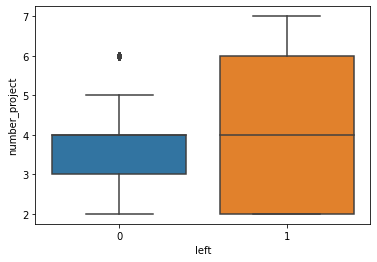

In [25]:
sns.boxplot(data = df, y='number_project', x='left')

Thus, we see that Satisfaction_level has a significant influence on Employee Retention

## TASK 4 (Building the Logistic Regression Model)

In [109]:
df1 = df[['salary', 'Department','satisfaction_level', 'average_montly_hours', 'promotion_last_5years','left']]

In [110]:
df1 = pd.get_dummies(df1, columns = ['Department','salary'])

In [111]:
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [112]:
X = np.asarray(df1.loc[:, df1.columns != 'left'])
y = np.asarray(df1.loc[:, df1.columns == 'left'])

In [113]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.ravel())
log_pred = model.predict(X_test)

## TASK 5 (Evaluation)

In [126]:
print(" accuracy = ", accuracy_score(y_test, log_pred)) 
print(" f1_score = ", f1_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

 accuracy =  0.7716666666666666
 f1_score =  0.36041083099906635
[[2122  165]
 [ 520  193]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.54      0.27      0.36       713

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



ROC AUC SCORE:  0.7684172568778589


Text(0, 0.5, 'True Positive Rate')

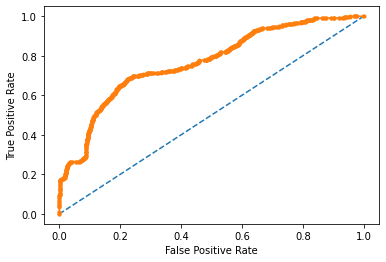

In [124]:
from sklearn.metrics import roc_auc_score,roc_curve
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.ravel())

y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print("ROC AUC SCORE: ",roc_auc_score(y_test, y_proba[:, 1]))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:,1])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')